##  Declaration : 


###  - Définition des vecteurs 

In [1]:
import math 
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
#--------------------------------------------------------------------------------
class XVector(object):
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
class YVector(object):
    def __init__(self, y1):
        self.y1 = y1  

###   - Cas d'une dérivée donnée ( gradient donné )

In [2]:
#-------------------------LA DERIVE DONNEE --------------------------------------
def f(X):
    return (X.x1-2)**2+(X.x2-3)**2
def df(X):
    return 2*(X.x1-2) , 2*(X.x2-3) #composantes du gradient : df/dx , df/dy


In [3]:
def descente_gradient_pas_fixe(f, df, X, alpha=1e-2, eps=1e-5, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient
    # df doit être la dérivée de f ( le gradient)
    # X est le valeur initial
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/100000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)
    
    gradx1, gradx2 = df(X)
    grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient (math.sqrt est la racine carrée)
    i=0
        
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((f(X), 0))
    
    while abs(grad)>eps: # tant que la pente n'est pas approximativement nulle
        gradx1, gradx2 = df(X) # on calcule la pente
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x1
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon X2
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((f(X), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory


###   - Cas d'une dérivée non donnée ( gradient non donné )

In [4]:
#----------------------DERIVE NON DONNEE-------------------------------------------------------
def g(x1,x2):
    return (x1-2)**2+(x2-3)**2

def descente_gradient_pas_fixe_2(g, X, alpha=1e-2, eps=1e-5, maxIter=1000):
    # Recherche le minimum d'une fonction f par descente de gradient avec dérivée numérique
    # X est le valeur initial
    # alpha est le taux d'apprentissage qui détermine la rapidité de la descente (par défaut 1/100)
    # eps est la précision souhaitée (par défaut 1/100000)
    # maxIter est le nombre maximum d'itération (par défaut 1000)    
    
    grad = 1
    i=0
    
    Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
    Xhistory.add_row((X.x1, X.x2, 0))
    Yhistory = Table(names=('Y', 'ETAPE'), dtype=('f8', 'i4'))
    Yhistory.add_row((g(X.x1, X.x2), 0))
    
    while abs(grad)>eps:
        gradx1 = (g(X.x1+eps,X.x2)-g(X.x1-eps,X.x2))/(2*eps) #approximation numérique de la dérivée df/dx1
        gradx2 = (g(X.x1, X.x2+eps)-g(X.x1, X.x2-eps))/(2*eps) #approximation numérique de la dérivée df/dx2
        grad = math.sqrt(gradx1**2+gradx2**2) # norme du gradient
        X.x1 = X.x1-alpha*gradx1 # on effectue un petit pas vers le bas selon x1
        X.x2 = X.x2-alpha*gradx2 # on effectue un petit pas vers le bas selon x2
        i += 1
        Xhistory.add_row((X.x1, X.x2, i))#  cette ligne pour imprimer les itérations
        Yhistory.add_row((g(X.x1, X.x2), i)) #  cette ligne pour imprimer les itérations
        if i > maxIter:
            return None # on abandonne si le nombre d'itérations est trop élevé
    return Xhistory,Yhistory



###  - Un test sur la fonction " descente_gradient_pas_fixe (...)" le gradient donnée



In [5]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)
#------------------------------- Descente1--------------------------------------------
print("---  descente_gradient_pas_fixe ----")
X, fX = descente_gradient_pas_fixe(f, df, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   fX    -------------")
print("----------------------------------")
print(fX)


---  descente_gradient_pas_fixe ----
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                0.0                 0.0     0
               0.04                0.06     1
0.07919999999999999 0.11879999999999999     2
           0.117616            0.176424     3
0.15526368000000002          0.23289552     4
       0.1921584064        0.2882376096     5
     0.228315238272      0.342472857408     6
0.26374893350656003    0.39562340025984     7
0.29847395483642886  0.4477109322546432     8
0.33250447573970027  0.4987567136095503     9
                ...                 ...   ...
 1.9999966961990254  2.9999950442985375   659
  1.999996762275045   2.999995143412567   660
  1.999996827029544  2.9999952405443158   661
 1.9999968904889531  2.9999953357334292   662
  1.999996952679174  2.9999954290187607   663
 1.9999970136255907  2.9999955204383855   664
  1.999997073353079

###  - Un test sur la fonction " descente_gradient_pas_fixe_2(...)"  le gradient non donnée


In [6]:
#--------------------------------- TEST-----------------------------------------------
X = XVector(0, 0)
Y = YVector(0)
#-------------------  descente_gradient_pas_fixe_2-  ----------------------------------
print("--- descente_gradient_pas_fixe_2 --")
X, gX = descente_gradient_pas_fixe_2(g, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   gX    -------------")
print("----------------------------------")
print(gX)

--- descente_gradient_pas_fixe_2 --
------------    X    -------------
----------------------------------
         x1                  x2          ETAPE
------------------- -------------------- -----
                0.0                  0.0     0
0.04000000000026205 0.060000000000393065     1
  0.079200000000057  0.11880000000097367     2
0.11761599999982053  0.17642400000106304     3
0.15526367999907364  0.23289552000171906     4
0.19215840639930093  0.28823760960250405     5
0.22831523827182565  0.34247285741084704     6
0.26374893350666895    0.395623400263112     7
0.29847395483706407   0.4477109322573724     8
 0.3325044757405138  0.49875671361299106     9
                ...                  ...   ...
 1.9999966961990254    2.999995044298539   659
  1.999996762275045   2.9999951434125682   660
  1.999996827029544   2.9999952405443167   661
 1.9999968904889531     2.99999533573343   662
  1.999996952679174   2.9999954290187616   663
 1.9999970136255907   2.9999955204383864   664
 

###  - Un test sur les deux fonction f1 et f2 " descente_gradient_pas_fixe_2(...)" gradient non donnée

In [7]:
#--------------           test f1            ----------------
def f1(x1,x2):
    return (((x1)**2)+(2*(x2)**2)+(x1*x2)+x1-x2+30)

#---------   descente_gradient_pas_fixe_2 de f1 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f1X = descente_gradient_pas_fixe_2(f1, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f1(X)    -------------")
print("----------------------------------")
print(f1X)

------------descente_gradient_pas_fixe_2-------------
------------    X    -------------
----------------------------------
         x1                  x2         ETAPE
------------------- ------------------- -----
                3.0                 3.0     0
  2.899999999989575     2.8600000000053     1
  2.803399999990461   2.726600000006016     2
  2.710065999988018   2.599502000005913     3
 2.6198696599876143  2.4784212600045237     4
 2.5326880541881565   2.363085713003585     5
 2.4484034359700786  2.2532354039411757     6
  2.366903013211072   2.148621953423799     7
  2.288078733410856  2.0490080451550625     8
   2.21182707829459  1.9541669360093579     9
                ...                 ...   ...
-0.7142790856030672  0.4285686828832098   797
-0.7142791907207595  0.4285687264234923   798
-0.7142792941704528   0.428568769272772   799
-0.7142793959805687 0.42856881144348336   800
-0.7142794961741998  0.4285688529445082   801
 -0.714279594779768   0.428568893788281   802
-0

In [8]:
#--------------           test f2            ----------------
def f2(x1,x2):
    return ((x1)**2+10*(x2)**2)

#------   descente_gradient_pas_fixe_2 de f2  ---------------
X = XVector(3, 3)   #X0(3,3)
print("--  descente_gradient_pas_fixe_2 ---")
X, f2X = descente_gradient_pas_fixe_2(f2, X)
print("------------    X    -------------")
print("----------------------------------")
print(X)
print("----------------------------------")
print("------------   f2(X)    -------------")
print("----------------------------------")
print(f2X)



--  descente_gradient_pas_fixe_2 ---
------------    X    -------------
----------------------------------
          x1                     x2          ETAPE
---------------------- --------------------- -----
                   3.0                   3.0     0
     2.939999999995166     2.399999999994293     1
      2.88119999999725    1.9199999999911483     2
    2.8235759999971606    1.5359999999872116     3
    2.7671044799965046    1.2287999999872596     4
    2.7117623903957195    0.9830399999869428     5
    2.6575271425882647    0.7864319999891762     6
    2.6043765997359998    0.6291455999914959     7
     2.552289067740851    0.5033164799942398     8
    2.5012432863861207     0.402653183995902     9
                   ...                   ...   ...
5.9438857741977265e-06 4.367513634912215e-22   650
 5.825008058713772e-06 4.367513634912215e-22   651
 5.708507897539497e-06 4.367513634912215e-22   652
 5.594337739588707e-06 4.367513634912215e-22   653
 5.482450984796933e-06 4.3

In [10]:
def f_allY(X):
    tmp = []
    for i in range(len(X[0])):
        tmp.append (f2(X[0][i],X[1][i]))
    return np.array(tmp)

X1max=X[1]['x1']
X1min=X[-1]['x1']
print('X1 MIN     : ',X1min)

X2max=X[1]['x2']
X2min=X[-1]['x2']
print('X2 MIN     : ',X2min)

Ymax=f2X[1]['Y']
Ymin=f2X[-1]['Y']
print('Y  MIN     : ',Ymin)

dom=[X1min,X1max,X2min,X2max]
T2Lignes=[X['x1'], X['x2']]
print(X['x1'])
print(X['x2'])




X1 MIN     :  4.856587433342696e-06
X2 MIN     :  4.367513634912215e-22
Y  MIN     :  2.3586441497702193e-11
          x1          
----------------------
                   3.0
     2.939999999995166
      2.88119999999725
    2.8235759999971606
    2.7671044799965046
    2.7117623903957195
    2.6575271425882647
    2.6043765997359998
     2.552289067740851
    2.5012432863861207
                   ...
5.9438857741977265e-06
 5.825008058713772e-06
 5.708507897539497e-06
 5.594337739588707e-06
 5.482450984796933e-06
 5.372801965100994e-06
 5.265345925798975e-06
 5.160039007282995e-06
 5.056838227137335e-06
 4.955701462594588e-06
 4.856587433342696e-06
Length = 661 rows
          x2         
---------------------
                  3.0
    2.399999999994293
   1.9199999999911483
   1.5359999999872116
   1.2287999999872596
   0.9830399999869428
   0.7864319999891762
   0.6291455999914959
   0.5033164799942398
    0.402653183995902
                  ...
4.367513634912215e-22
4.36751363491

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fun(f,dom):
    
    # affichage du graphe d'une fonction de R^2 dans R,
    # de ses lignes de niveau,
    # et valeur de son minimum sur une grille discrÃ¨te.
    # f : fonction (prenant en entrÃ©e un tableau Ã  2 lignes de points Ã  calculer)
    # dom : domaine de la grille
    
    # Definition des valeurs x1 et x2, des grilles correspondantes et evaluation de f
    x, y = np.linspace(dom[0],dom[1],200), np.linspace(dom[2],dom[3],200)
    x, y = np.meshgrid(x,y)
    z = f(np.array([x.flatten(),y.flatten()])).reshape(x.shape)
    
    # valeur et position du minimum sur la grille:
    imin = np.unravel_index(np.argmin(z),z.shape)
    zmin = z[imin]
    print('valeur du minimum sur la grille : ',zmin)
    xmin, ymin = x[imin], y[imin]
    print('position du minimiseur : (',xmin,',',ymin,')')
    
    # Graphique 3D:
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot([xmin,xmin],[ymin,ymin],[0,zmin],marker='o')
    ax.plot_surface(x, y, z)
    ax.set_title('Graphe de la fonction')
    
    # Graphique des lignes de niveaux
    fig, ax = plt.subplots()
    CS = ax.contour(x, y, z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Lignes de niveau')

valeur du minimum sur la grille :  2.3586441497702193e-11
position du minimiseur : ( 4.856587433342696e-06 , 4.367513634912215e-22 )


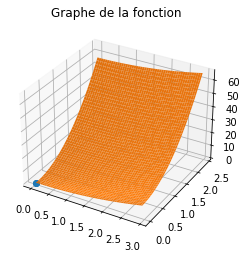

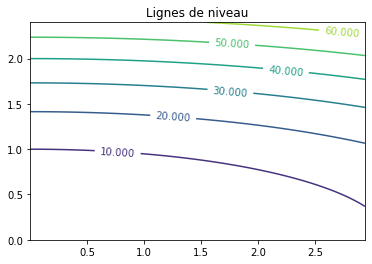

In [38]:
plot_fun(f_allY,dom)


------------descente_gradient_pas_fixe_2-------------


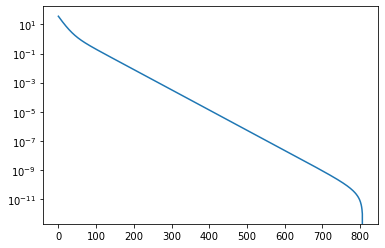

In [14]:
import matplotlib.pyplot as plt 

#---------   descente_gradient_pas_fixe_2 de f1 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f1X = descente_gradient_pas_fixe_2(f1, X)

X1min=X[-1]['x1']
X2min=X[-1]['x2']

plt.semilogy(f1X['Y']-f1(X1min,X2min))


------------descente_gradient_pas_fixe_2-------------


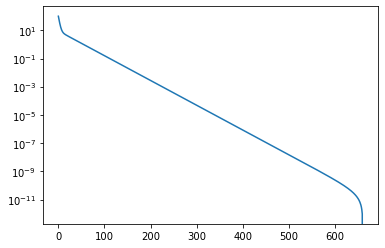

In [15]:
#---------   descente_gradient_pas_fixe_2 de f2 -------------
X = XVector(3, 3)
print("------------descente_gradient_pas_fixe_2-------------")
X, f2X = descente_gradient_pas_fixe_2(f2, X)

X1min=X[-1]['x1']
X2min=X[-1]['x2']

plt.semilogy(f2X['Y']-f2(X1min,X2min))

In [28]:


import numpy as np
alpha = 0.1
beta = 0.7
eps=1e-5

#--------------     test  avec la fonction f2            ----------------
def f(x1,x2):
    return ((x1)**2+10*(x2)**2)

def dfx1 (x): 
    return (2*x)

def dfx2 (x): 
    return (20*x)

t = 1
count = 1
x0 = XVector(3, 3)
#x0 = np.array([3,3])
dx0 = np.array([6, 60])
Xhistory = Table(names=('x1', 'x2', 'ETAPE'), dtype=('f8', 'f8', 'i4'))
Xhistory.add_row((x0.x1, x0.x2, 0))


def backtrack(x0, dfx1, dfx2, t, alpha, beta, count):
    Xhistory.add_row((x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2), 0))
    while (f(x0.x1,x0.x2) - (f(x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2))) + alpha * t * np.dot(np.array([dfx1(x0.x1), dfx2(x0.x2)]), np.array([dfx1(x0.x1), dfx2(x0.x2)]))) < eps:
        Xhistory.add_row((x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2), format(count)))
        t *= beta
        print("""

########################
###   iteration {}   ###
########################
""".format(count))
        print("Inequality: ",  f(x0.x1,x0.x2) - (f(x0.x1,x0.x2) - (f(x0.x1-t*dfx1(x0.x1), x0.x2-t*dfx2(x0.x2))) + alpha * t * np.dot(np.array([dfx1(x0.x1), dfx2(x0.x2)]), np.array([dfx1(x0.x1), dfx2(x0.x2)]))))
        count += 1
    return t,Xhistory

t ,Xhis = backtrack(x0, dfx1, dfx2, t, alpha, beta,count)

print("\nfinal step size :",  t)
print(Xhis)



########################
###   iteration 1   ###
########################

Inequality:  14956.92


########################
###   iteration 2   ###
########################

Inequality:  6791.439599999997


########################
###   iteration 3   ###
########################

Inequality:  2966.736563999999


########################
###   iteration 4   ###
########################

Inequality:  1216.099728359999


########################
###   iteration 5   ###
########################

Inequality:  444.7150352963994


########################
###   iteration 6   ###
########################

Inequality:  127.23568517523583


########################
###   iteration 7   ###
########################

Inequality:  14.020208251865569

final step size : 0.08235429999999996
         x1                  x2         ETAPE
------------------- ------------------- -----
                3.0                 3.0     0
               -3.0               -57.0     0
               -3.0         